In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [49]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submission = pd.read_csv("./sample_submission.csv")

In [50]:
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
test.head()

,index,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
submission.head()

,index,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


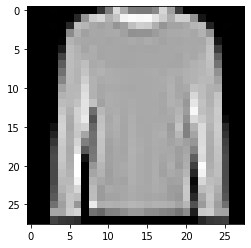

In [53]:
img = np.array(train.iloc[81,2:], dtype = "float32").reshape((28,28))
plt.imshow(img, cmap="gray")
plt.show()

In [54]:
train_data = np.array(train.iloc[:,1:], dtype = "float32")
test_data = np.array(test.iloc[:,1:], dtype = "float32")

In [55]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test= test_data/255

In [56]:
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.2, random_state=12345)

In [57]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_valid = x_valid.reshape(x_valid.shape[0],28,28,1)

In [66]:
CNN = tf.keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation = "relu", input_shape = (28,28,1)),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(32,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [67]:
CNN.compile(loss="sparse_categorical_crossentropy",
            optimizer=optimizers.Adam(lr=0.001),
            metrics=["accuracy"])

In [70]:
history = CNN.fit(
    x_train,
    y_train,
    batch_size = 512,
    epochs = 50,
    verbose = 1,
    validation_data = (x_valid, y_valid)
)

Epoch 1/50
94/94 [==============================] - 1s 11ms/step - loss: 0.2044 - accuracy: 0.9269 - val_loss: 0.2542 - val_accuracy: 0.9092
Epoch 2/50
94/94 [==============================] - 1s 10ms/step - loss: 0.1979 - accuracy: 0.9300 - val_loss: 0.2520 - val_accuracy: 0.9096
Epoch 3/50
94/94 [==============================] - 1s 10ms/step - loss: 0.1924 - accuracy: 0.9326 - val_loss: 0.2579 - val_accuracy: 0.9097
Epoch 4/50
94/94 [==============================] - 1s 10ms/step - loss: 0.1858 - accuracy: 0.9351 - val_loss: 0.2480 - val_accuracy: 0.9130
Epoch 5/50
94/94 [==============================] - 1s 10ms/step - loss: 0.1824 - accuracy: 0.9352 - val_loss: 0.2502 - val_accuracy: 0.9133
Epoch 6/50
94/94 [==============================] - 1s 10ms/step - loss: 0.1788 - accuracy: 0.9375 - val_loss: 0.2479 - val_accuracy: 0.9105
Epoch 7/50
94/94 [==============================] - 1s 11ms/step - loss: 0.1759 - accuracy: 0.9370 - val_loss: 0.2666 - val_accuracy: 0.9052
Epoch 8/50
94

In [71]:
y_pred = np.argmax(CNN.predict(x_test), axis=-1)

In [72]:
submission["label"] = y_pred
submission.to_csv("fashion_submission.csv", index=False)